In [12]:
import pandas as pd

df_labeled = pd.read_csv('labeledTrainData.tsv',sep = '\t')
display(df_labeled)
print(type(df_labeled['sentiment'][0]))


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


<class 'numpy.int64'>


In [13]:
df_unlabeled = pd.read_csv('unlabeledTrainData.tsv',sep = '\t' ,error_bad_lines=False)
display(df_unlabeled)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 43043: expected 2 fields, saw 3\n'


,id,review
0,9999_0,"Watching Time Chasers, it obvious that it was ..."
1,45057_0,I saw this film about 20 years ago and remembe...
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba..."
3,7161_0,I went to see this film with a great deal of e...
4,43971_0,"Yes, I agree with everyone on this site this m..."
...,...,...
49993,18984_0,The original Man Eater by Joe D'Amato is somew...
49994,16433_0,When Home Box Office was in it's early days mo...
49995,16006_0,Griffin Dunne was born into a cultural family....
49996,40155_0,"Not a bad story, but the low budget rears its ..."


In [14]:
df_labeled['review'] = df_labeled['review'].str.lower()
print(df_labeled)

            id  sentiment                                             review
0       5814_8          1  with all this stuff going down at the moment w...
1       2381_9          1  \the classic war of the worlds\" by timothy hi...
2       7759_3          0  the film starts with a manager (nicholas bell)...
3       3630_4          0  it must be assumed that those who praised this...
4       9495_8          1  superbly trashy and wondrously unpretentious 8...
...        ...        ...                                                ...
24995   3453_3          0  it seems like more consideration has gone into...
24996   5064_1          0  i don't believe they made this film. completel...
24997  10905_3          0  guy is a loser. can't get girls, needs to buil...
24998  10194_3          0  this 30 minute documentary buñuel made in the ...
24999   8478_8          1  i saw this movie as a child and it broke my he...

[25000 rows x 3 columns]


In [15]:
df_unlabeled['review'] = df_unlabeled['review'].str.lower()
print(df_unlabeled)

            id                                             review
0       9999_0  watching time chasers, it obvious that it was ...
1      45057_0  i saw this film about 20 years ago and remembe...
2      15561_0  minor spoilers<br /><br />in new york, joan ba...
3       7161_0  i went to see this film with a great deal of e...
4      43971_0  yes, i agree with everyone on this site this m...
...        ...                                                ...
49993  18984_0  the original man eater by joe d'amato is somew...
49994  16433_0  when home box office was in it's early days mo...
49995  16006_0  griffin dunne was born into a cultural family....
49996  40155_0  not a bad story, but the low budget rears its ...
49997  35270_0  this not-very-good mummy-alien flick does feat...

[49998 rows x 2 columns]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_labeled['review']
y = df_labeled['sentiment']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

In [19]:
X_train.shape

(17500,)

In [20]:
X_test.shape

(5000,)

In [21]:
X_val.shape

(2500,)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [23]:
import numpy as np
print(np.__version__)
print("median words in sentence: ")
print(np.median(X_train.apply(text_to_word_sequence).apply(len)))
print("mean words in sentence: ")
print(np.mean(X_train.apply(text_to_word_sequence).apply(len)))

1.21.6
median words in sentence: 
177.0
mean words in sentence: 
238.0789142857143


In [24]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(X_train)
padding= "post"
seqandpad = lambda df_column: pad_sequences(tokenizer.texts_to_sequences(df_column), maxlen=100, padding = padding)
word_index = tokenizer.word_index

In [25]:
X_train, X_test, X_val = seqandpad(X_train), seqandpad(X_test), seqandpad(X_val)

In [26]:
print(X_train)

[[ 338   47  285 ...    4  154  386]
 [ 450   50   41 ...    1  203 6638]
 [5001    4    1 ...   85   73 9459]
 ...
 [   3   81  120 ...   58  109  142]
 [  10  413   43 ...  219   17  581]
 [  89   63  450 ...  247    4  526]]


In [27]:
#load embeddings

#import gensim.downloader as api
from gensim.models import FastText

corpus = df_unlabeled['review'].tail(20000).to_list()

ft = FastText(size = 100, window=3, min_count= 1, seed= 33)
ft.build_vocab(corpus)
ft.train(corpus, total_examples=ft.corpus_count, epochs = 10)

In [28]:
embedding_matrix_ft = np.random.random((len(tokenizer.word_index)+1, ft.vector_size))

pas= 0
for word, i in tokenizer.word_index.items():
  try:
    embedding_matrix_ft[i] = ft.wv[word]
  except:
    pas+=1

In [29]:
embedding_matrix_ft.shape

(75637, 100)

In [30]:
from tensorflow.keras.models import *
from keras.layers import *

In [31]:
X_train[0].shape

(100,)

In [32]:
type(X_train[0])

numpy.ndarray

In [33]:
IMAGE_SIZE = (100,)

In [34]:
totalwords = len(word_index)+1
embed_dim = ft.vector_size

embedding_layer = Embedding(totalwords, embed_dim, weights= [embedding_matrix_ft], trainable = False)

model = tf.keras.models.Sequential([Input(shape=IMAGE_SIZE),
                                    embedding_layer,
                                    SimpleRNN(128, activation= 'relu'),
                                    Dense(2, activation='softmax')
                                    ])


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience= 2, min_lr=0.01)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights= True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('SentModel.h5', save_best_only= True)

model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics= ['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          7563700   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               29312     
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 7,593,270
Trainable params: 29,570
Non-trainable params: 7,563,700
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 50, validation_data= (X_val, y_val),callbacks= [reduce_lr, checkpoint_cb, early_stopping_cb])

Epoch 1/50
505/547 [==========================>...] - ETA: 3s - loss: 0.6760 - accuracy: 0.5480

In [48]:
y_test.shape

(5000,)

In [49]:
y_train.shape

(17500,)

In [50]:
y_val.shape

(2500,)

In [51]:
X_train.shape

(17500, 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


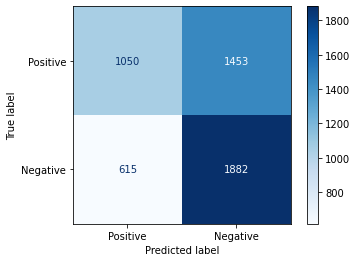

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#import numpy as np
predict = model.predict_generator(X_test)

y_pred = np.argmax(predict, axis=1)
labels = ("Positive", "Negative")

cm=confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap= plt.cm.Blues)
plt.show()